<a href="https://colab.research.google.com/github/appzolutions/Intereview-starwarApp/blob/main/group15_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
COLLABORATORS = "Salam Dawod, ... "

#Load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# file_path = './data.csv'
file_path = './content/data.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print("Initial DataFrame Info:")
print(df.info())
print("\nFirst few rows of the data:")
print(df.head())


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657280 entries, 0 to 657279
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          657280 non-null  int64 
 1   MONTH        657280 non-null  object
 2   GEOGRAPHY    657280 non-null  object
 3   LFS CHARCT.  657280 non-null  object
 4   Occupation   657280 non-null  object
 5   AGE GROUP    657280 non-null  object
 6   Both sexes   657280 non-null  object
 7   Male         657280 non-null  object
 8   Female       657280 non-null  object
dtypes: int64(1), object(8)
memory usage: 45.1+ MB
None

First few rows of the data:
   _id    MONTH               GEOGRAPHY     LFS CHARCT.  \
0    1  Mar2001  Total, Ontario regions    Labour force   
1    2  Mar2001  Total, Ontario regions    Labour force   
2    3  Mar2001  Total, Ontario regions    Labour force   
3    4  Mar2001  Total, Ontario regions    Labour force   
4    5  Mar2001  Total, 

In [ ]:
df.head()

,_id,MONTH,GEOGRAPHY,LFS CHARCT.,Occupation,AGE GROUP,Both sexes,Male,Female
0,1,Mar2001,"Total, Ontario regions",Labour force,"Total, all occupations","Total, 15 years and over",6189.5,3303.2,2886.3
1,2,Mar2001,"Total, Ontario regions",Labour force,"Total, all occupations",15-64 years,6101.8,3244.9,2856.9
2,3,Mar2001,"Total, Ontario regions",Labour force,"Total, all occupations",15-19,404.6,200.4,204.2
3,4,Mar2001,"Total, Ontario regions",Labour force,"Total, all occupations",20-24,552.5,286.7,265.8
4,5,Mar2001,"Total, Ontario regions",Labour force,"Total, all occupations",25-44,3221.4,1713.8,1507.6


# Data cleaning & Exploratory Data Analysis

Removing unwanted data (redundent & unmeaning data)

In [ ]:
df1 = df

In [ ]:
df1 = df1[~df1['Both sexes'].isin(['-'])]
df1 = df1[~df1['Occupation'].isin(['Total, all occupations', 'Unclassified occupations'])]
df1= df1[~df1['AGE GROUP'].isin(['Total, 15 years and over',' 15-64 years'])]
df1 = df1[~df1['GEOGRAPHY'].isin(['Total, Ontario regions'])]

In [ ]:
df1['Female'] = df1['Female'].str.replace('-', '0')
df1['Male'] = df1['Male'].str.replace('-', '0')

In [ ]:
df1['Both sexes'] = pd.to_numeric(df1['Both sexes'])
df1['Male'] = pd.to_numeric(df1['Male'])
df1['Female'] = pd.to_numeric(df1['Female'])

In [ ]:
df1['MONTH'] = pd.to_datetime(df1['MONTH']).dt.strftime('%b-%Y')
df1.info()

<ipython-input-91-5b1514a49581>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['MONTH'] = pd.to_datetime(df1['MONTH']).dt.strftime('%b-%Y')


<class 'pandas.core.frame.DataFrame'>
Index: 353788 entries, 1674 to 657271
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   _id          353788 non-null  int64  
 1   MONTH        353788 non-null  object 
 2   GEOGRAPHY    353788 non-null  object 
 3   LFS CHARCT.  353788 non-null  object 
 4   Occupation   353788 non-null  object 
 5   AGE GROUP    353788 non-null  object 
 6   Both sexes   353788 non-null  float64
 7   Male         353788 non-null  float64
 8   Female       353788 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# Extract year from 'MONTH' column
df1['year'] = pd.to_datetime(df1['MONTH'], format='%b-%Y').dt.year
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Assess Data Quality:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#1. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values (Count and %):")
print(pd.DataFrame({"Missing Count": missing_values, "Percentage": missing_percentage}))

# 2. Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")

# 3. Validate date column
try:
    df['month'] = pd.to_datetime(df['month'], format='%b%Y', errors='coerce')
    invalid_dates = df['month'].isnull().sum()
    print(f"\nInvalid Date Entries: {invalid_dates}")
except KeyError:
    print("\n'Month' column not found.")

# 4. Summary of categorical data
print("\nUnique Values in Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

# 5. Inspect unique values in age_group
df['age_group'] = df['age_group'].str.replace('years', '').str.strip()
print("\nUnique values in age_group column:", df['age_group'].unique())


Missing Values (Count and %):
             Missing Count  Percentage
_id                      0         0.0
month                    0         0.0
geography                0         0.0
lfs_charct.              0         0.0
occupation               0         0.0
age_group                0         0.0
both_sexes               0         0.0
male                     0         0.0
female                   0         0.0

Duplicate Rows: 0

Invalid Date Entries: 0

Unique Values in Categorical Columns:
geography: 5 unique values
lfs_charct.: 4 unique values
occupation: 52 unique values
age_group: 8 unique values
both_sexes: 9192 unique values
male: 6486 unique values
female: 6334 unique values

Unique values in age_group column: ['Total, 15  and over' '15-64' '15-19' '20-24' '25-44' '45-54' '55-64'
 '65  and over']


In [ ]:
# Data Cleaning
# 1. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Check and report missing values
missing_values = df.isnull().sum()
#print("\nMissing values in each column:")
#print(missing_values)


# Remove rows with missing values
df_cleaned = df.dropna().copy()

# Convert 'both_sexes', female and male counts columns to numeric
df_cleaned['both_sexes'] = pd.to_numeric(df_cleaned['both_sexes'], errors='coerce')
df_cleaned['female'] = pd.to_numeric(df_cleaned['female'], errors='coerce')
df_cleaned['male'] = pd.to_numeric(df_cleaned['male'], errors='coerce')

df_cleaned['year'] = df_cleaned['month'].dt.year

df_cleaned

,_id,month,geography,lfs_charct.,occupation,age_group,both_sexes,male,female,year
0,1,2001-03-01,"Total, Ontario regions",Labour force,"Total, all occupations","Total, 15 and over",6189.5,3303.2,2886.3,2001
1,2,2001-03-01,"Total, Ontario regions",Labour force,"Total, all occupations",15-64,6101.8,3244.9,2856.9,2001
2,3,2001-03-01,"Total, Ontario regions",Labour force,"Total, all occupations",15-19,404.6,200.4,204.2,2001
3,4,2001-03-01,"Total, Ontario regions",Labour force,"Total, all occupations",20-24,552.5,286.7,265.8,2001
4,5,2001-03-01,"Total, Ontario regions",Labour force,"Total, all occupations",25-44,3221.4,1713.8,1507.6,2001
...,...,...,...,...,...,...,...,...,...,...
657275,657276,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,20-24,0.0,0.0,0.0,2020
657276,657277,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,25-44,100.0,0.0,0.0,2020
657277,657278,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,45-54,0.0,0.0,0.0,2020
657278,657279,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,55-64,100.0,100.0,0.0,2020


In [ ]:
missing_values = df_cleaned.isnull().sum()
print("\nMissing values in each column:",missing_values)


Missing values in each column: _id                0
month              0
geography          0
lfs_charct.        0
occupation         0
age_group          0
both_sexes     27644
male           49168
female         77908
year               0
dtype: int64


In [ ]:
df_cleaned = df_cleaned.dropna().copy()

In [ ]:
missing_values = df_cleaned.isnull().sum()
print("\nMissing values in each column:",missing_values)


Missing values in each column: _id            0
month          0
geography      0
lfs_charct.    0
occupation     0
age_group      0
both_sexes     0
male           0
female         0
year           0
dtype: int64


In [ ]:
df_cleaned[df_cleaned['male'] == 0]

,_id,month,geography,lfs_charct.,occupation,age_group,both_sexes,male,female,year
58,59,2001-03-01,"Total, Ontario regions",Labour force,11 - Professional occupations in business and ...,15-19,0.0,0.0,0.0,2001
75,76,2001-03-01,"Total, Ontario regions",Labour force,"13 - Finance, insurance and related business a...",20-24,3.3,0.0,2.2,2001
78,79,2001-03-01,"Total, Ontario regions",Labour force,"13 - Finance, insurance and related business a...",55-64,8.7,0.0,7.5,2001
79,80,2001-03-01,"Total, Ontario regions",Labour force,"13 - Finance, insurance and related business a...",65 and over,0.0,0.0,0.0,2001
87,88,2001-03-01,"Total, Ontario regions",Labour force,14 - Office support occupations,65 and over,3.3,0.0,2.1,2001
...,...,...,...,...,...,...,...,...,...,...
657267,657268,2020-09-01,Northern region,Unemployment rate,"96 - Labourers in processing, manufacturing an...",20-24,0.0,0.0,0.0,2020
657274,657275,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,15-19,100.0,0.0,0.0,2020
657275,657276,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,20-24,0.0,0.0,0.0,2020
657276,657277,2020-09-01,Northern region,Unemployment rate,Unclassified occupations,25-44,100.0,0.0,0.0,2020


## **Occupation-Specific Trends:**

 a labor market analysis that categorizes the workforce by occupation.

In [ ]:
# Analyze the most required occupation
occupation_analysis = df_cleaned.groupby('occupation')['both_sexes'].sum().sort_values(ascending=False)

occupation_analysis_df = occupation_analysis.reset_index()
# Rename columns
occupation_analysis_df.columns = ['Occupation', 'Total Count']

# Display the top 20 occupations
top_20_occupations = occupation_analysis_df.head(20)

print("Top 20 Occupations by Total Count:")
print(top_20_occupations.to_string())


Top 20 Occupations by Total Count:
                                                                           Occupation  Total Count
0                                                              Total, all occupations    6745796.2
1                                                   6 - Sales and service occupations    1594368.5
2                                1 - Business, finance and administration occupations    1109303.7
3               7 - Trades, transport and equipment operators and related occupations     909690.0
4     4 - Occupations in education, law and social, community and government services     693008.1
5                                                          0 - Management occupations     636991.9
6                            2 - Natural and applied sciences and related occupations     505933.7
7                                      9 - Occupations in manufacturing and utilities     453773.7
8                                                            Unclassified 

In [ ]:
# Remove 'Total, all occupations' and  'Unclassified occupations'
df_filtered = df_cleaned[
    (df_cleaned['occupation'] != 'Total, all occupations') &
    (df_cleaned['occupation'] != 'Unclassified occupations')
]

# Grouping and analysis Most required occupation by geographical location
regional_occupation_analysis = df_filtered.groupby(['geography', 'occupation'])['both_sexes'].sum()
most_required_by_region = regional_occupation_analysis.groupby(level=0).idxmax()
most_required_count_by_region = regional_occupation_analysis.groupby(level=0).max()

most_required_by_region_df = pd.DataFrame({
    'Most Required Occupation': most_required_by_region,
    'Total Count': most_required_count_by_region
}).reset_index()

most_required_by_region_df.columns = ['Region', 'Most Required Occupation', 'Total Count']

print(most_required_by_region_df.to_string())


                   Region                                     Most Required Occupation  Total Count
0          Central region          (Central region, 6 - Sales and service occupations)     411680.5
1          Eastern region          (Eastern region, 6 - Sales and service occupations)     119615.2
2         Northern region         (Northern region, 6 - Sales and service occupations)      47061.5
3  Total, Ontario regions  (Total, Ontario regions, 6 - Sales and service occupations)     793318.1
4          Western region          (Western region, 6 - Sales and service occupations)     222693.2


**The most in-demand occupations in each region.**
The corresponding size of the workforce for those occupations.

In [ ]:
# Group data by geography and occupation, summing the participation
regional_occupation_analysis = df_filtered.groupby(['geography', 'occupation'])['both_sexes'].sum()

# Loop through each region and get the top 10 occupations
top_occupations_by_region = {}

for region in regional_occupation_analysis.index.get_level_values(0).unique():
    # Filter the data for the current region
    regional_data = regional_occupation_analysis.loc[region]

    # Sort occupations by participation count in descending order
    top_occupations_by_region[region] = regional_data.sort_values(ascending=False).head(10)

# Display the results
for region, occupations in top_occupations_by_region.items():
    print(f"\nTop 10 Occupations in {region}:")
    print(occupations.to_string())
    print("\n")



Top 10 Occupations in Central region:
occupation
6 - Sales and service occupations                                                  411680.5
1 - Business, finance and administration occupations                               323075.1
7 - Trades, transport and equipment operators and related occupations              211994.5
0 - Management occupations                                                         174133.6
4 - Occupations in education, law and social, community and government services    170506.4
2 - Natural and applied sciences and related occupations                           143117.0
9 - Occupations in manufacturing and utilities                                     113458.4
11 - Professional occupations in business and finance                               92123.6
21 - Professional occupations in natural and applied sciences                       91880.8
14 - Office support occupations                                                     91223.1



Top 10 Occupations in Easte

**Gender participation Trend**

In [ ]:
df_filtered = df_cleaned[(df_cleaned['occupation'] != 'Total, all occupations')].copy()

# Analyze gender participation rates
df_filtered['female_participation'] = df_filtered['female'] / df_filtered['both_sexes'] * 100
df_filtered['male_participation'] = df_filtered['male'] / df_filtered['both_sexes'] * 100

# Group by occupation and calculate average participation rates
gender_analysis = df_filtered.groupby('occupation')[['female_participation', 'male_participation']].mean()

gender_analysis.head(20)

,female_participation,male_participation
occupation,,
0 - Management occupations,35.691632,62.980579
00 - Senior management occupations,19.267789,62.778423
01-05 - Specialized middle management occupations,42.833213,49.578032
06 - Middle management occupations in retail and wholesale trade and customer services,36.785833,53.529576
"07-09 - Middle management occupations in trades, transportation, production and utilities",10.712166,81.723931
"1 - Business, finance and administration occupations",67.525909,36.584679
11 - Professional occupations in business and finance,47.455696,46.507631
12 - Administrative and financial supervisors and administrative occupations,75.352268,19.381803
"13 - Finance, insurance and related business administrative occupations",73.340176,13.872129


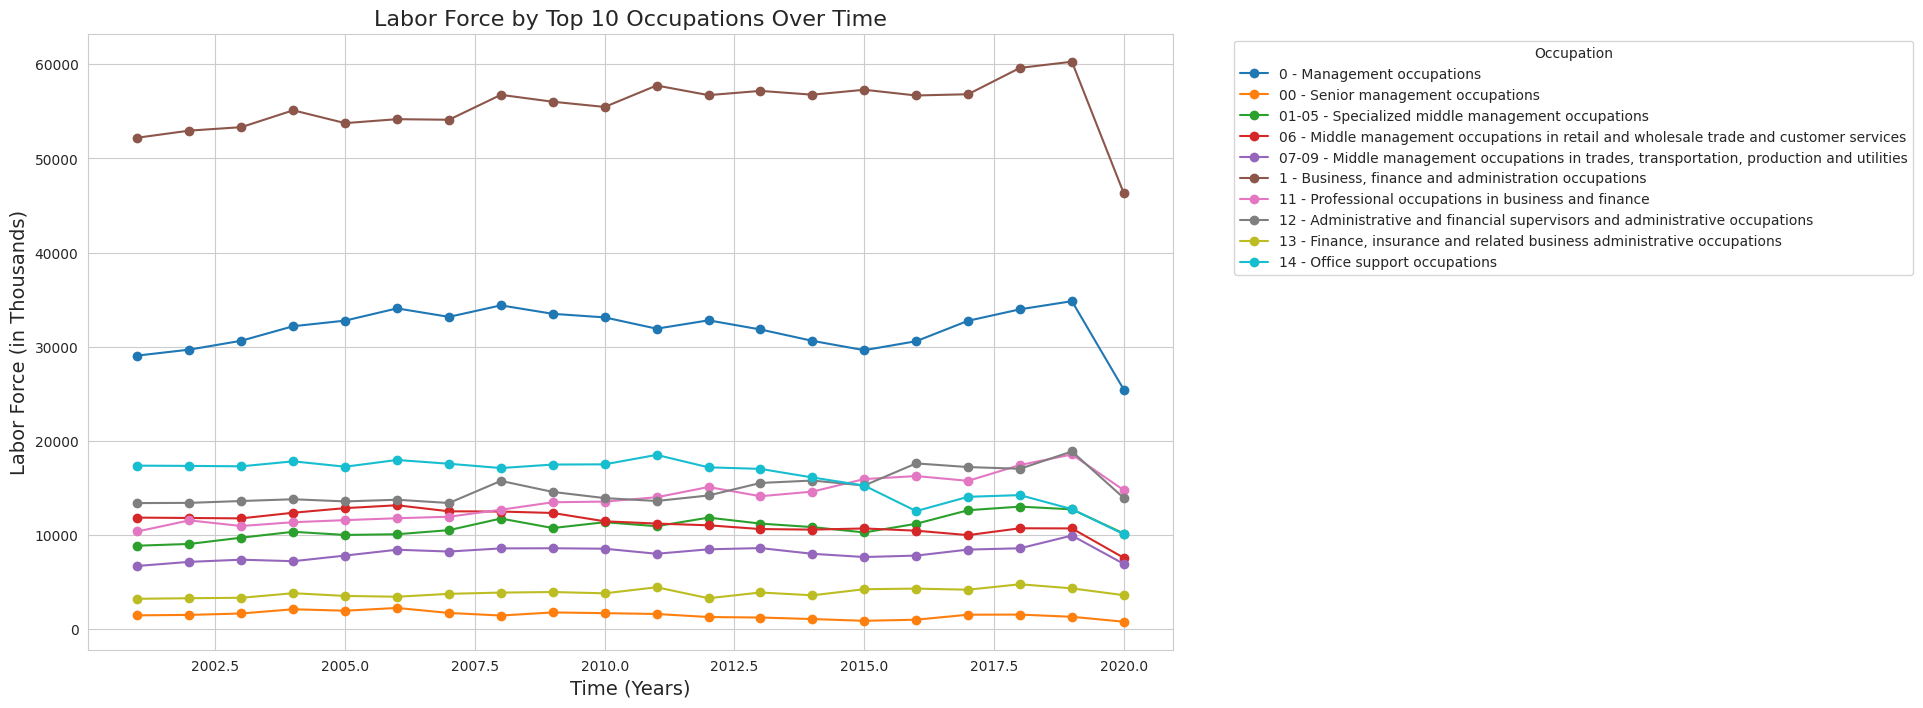

In [ ]:
# Group data by 'Year' and 'Occupation', summing the labor force for each group
occupation_trends = df_filtered.groupby(['year', 'occupation'])['both_sexes'].sum().unstack()

# Limit the plot to the first 10 occupations
occupation_trends_first_10 = occupation_trends.iloc[:, :10]

# Plot the trends for the first 10 occupations
plt.figure(figsize=(14, 8))
occupation_trends_first_10.plot(ax=plt.gca(), marker='o')
plt.title('Labor Force by Top 10 Occupations Over Time', fontsize=16)
plt.xlabel('Time (Years)', fontsize=14)
plt.ylabel('Labor Force (in Thousands)', fontsize=14)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



**Labor Force Trends by Age Group**

The 25-44 age group shows the highest labor force participation across all categories (male, female, and both sexes).
Participation declines significantly in older age groups (e.g., 55+).



Unique values in age_group column: ['Total, 15  and over' '15-64' '15-19' '20-24' '25-44' '45-54' '55-64'
 '65  and over']


<Figure size 1200x800 with 0 Axes>

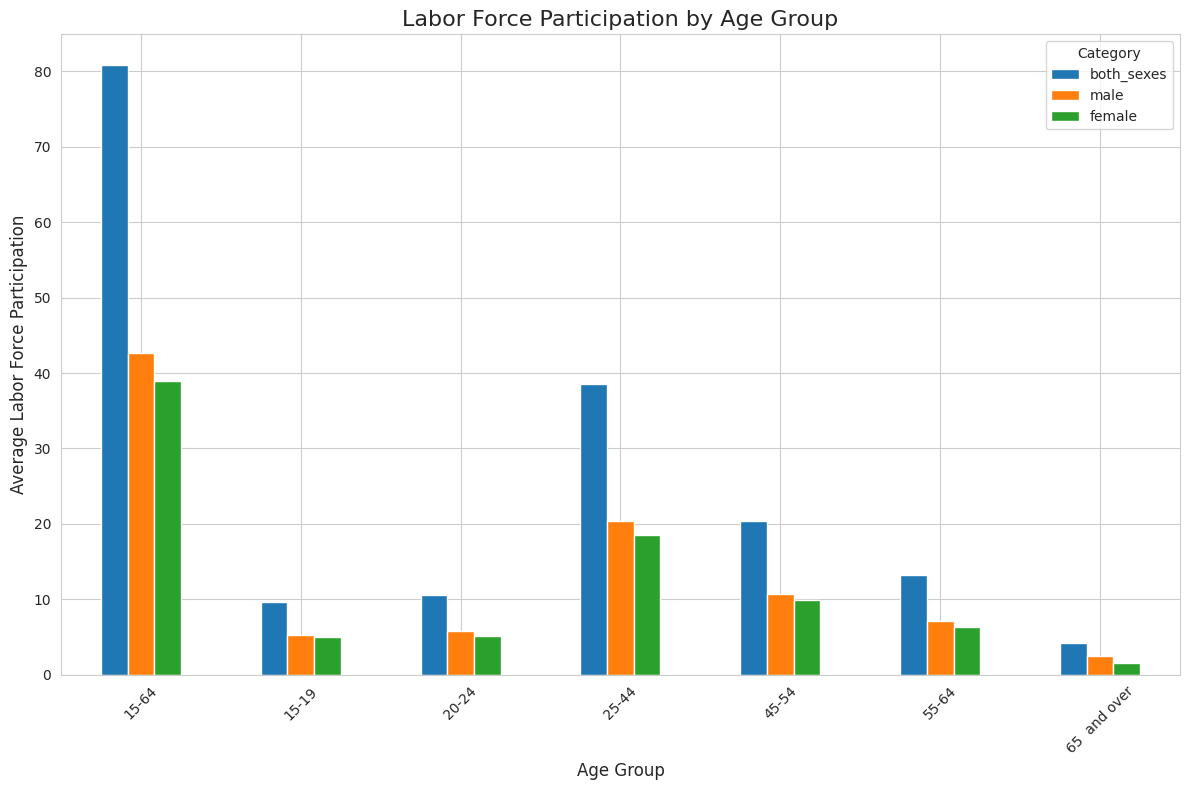

In [ ]:

print("Unique values in age_group column:", df_cleaned['age_group'].unique())

age_order = [
    '15-64', '15-19', '20-24', '25-44', '45-54', '55-64', '65  and over'
]

# Group the data by age group and calculate average participation rates
age_group_stats = df_cleaned.groupby('age_group')[['both_sexes', 'male', 'female']].mean()

# Retain only the rows that match the age_order
age_group_stats = age_group_stats.loc[age_group_stats.index.intersection(age_order)]

# Sort by age_order
age_group_stats = age_group_stats.reindex(age_order)

# Plot labor force participation by age group
plt.figure(figsize=(12, 8))
age_group_stats.plot(kind='bar', figsize=(12, 8), title='Labor Force Participation by Age Group')
plt.title('Labor Force Participation by Age Group', fontsize=16)
plt.ylabel('Average Labor Force Participation', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", fontsize=10)
plt.tight_layout()
plt.show()


**Time-Based Trends**

- Labor force participation per gender
- Observe consistent participation rates across months or identify gradual changes.


Monthly Trends:
      both_sexes       male     female
year                                  
2001   33.176755  17.957578  15.509225
2002   34.188878  18.493245  16.039774
2003   34.857924  18.755674  16.460892
2004   35.551246  19.079253  16.795097
2005   35.462755  19.056821  16.772367


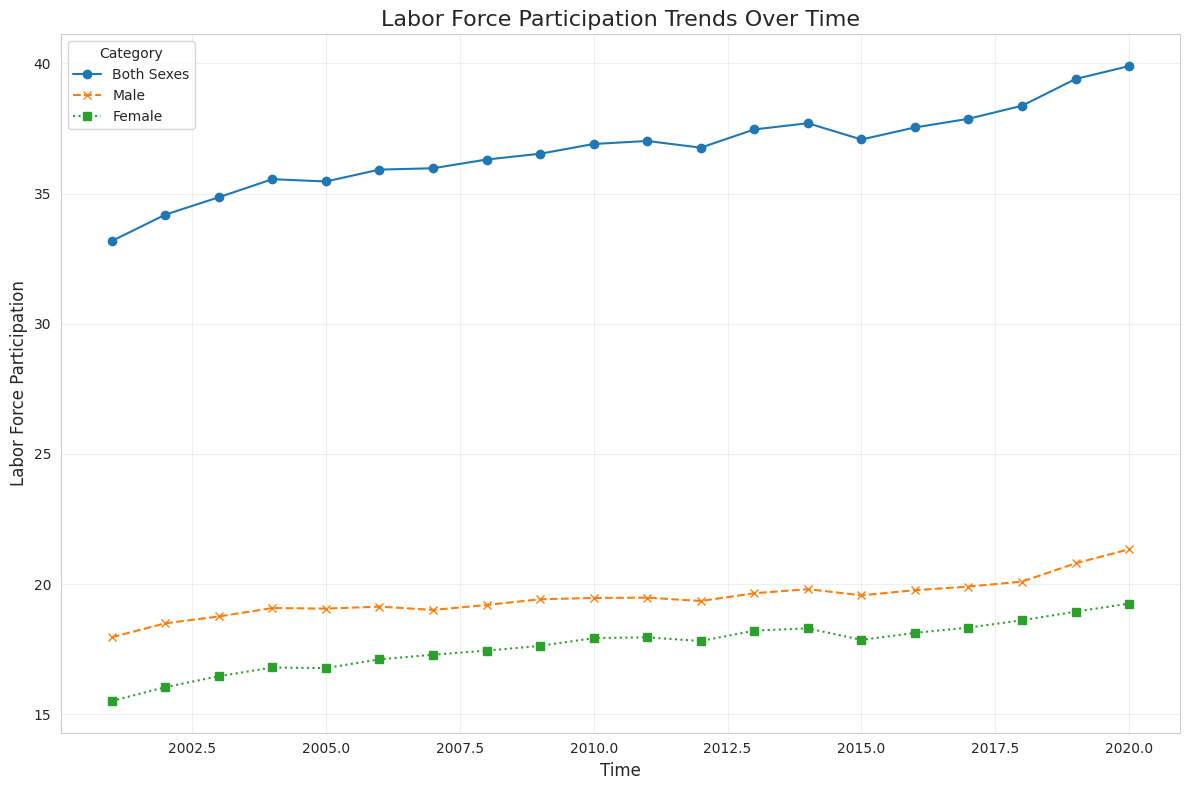

In [ ]:
# Group by month and calculate average participation
monthly_trends = df_cleaned.groupby('year')[['both_sexes', 'male', 'female']].mean()

print("Monthly Trends:")
print(monthly_trends.head())
# Plot labor force participation trends over time
plt.figure(figsize=(12, 8))
plt.plot(monthly_trends.index, monthly_trends['both_sexes'], label='Both Sexes', marker='o')
plt.plot(monthly_trends.index, monthly_trends['male'], label='Male', linestyle='--', marker='x')
plt.plot(monthly_trends.index, monthly_trends['female'], label='Female', linestyle=':', marker='s')

# Add labels and title
plt.title('Labor Force Participation Trends Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Labor Force Participation', fontsize=12)
plt.legend(title="Category", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


**Occupation Trend:** "Increase in Health Sector Labor Force Participation Per Year"

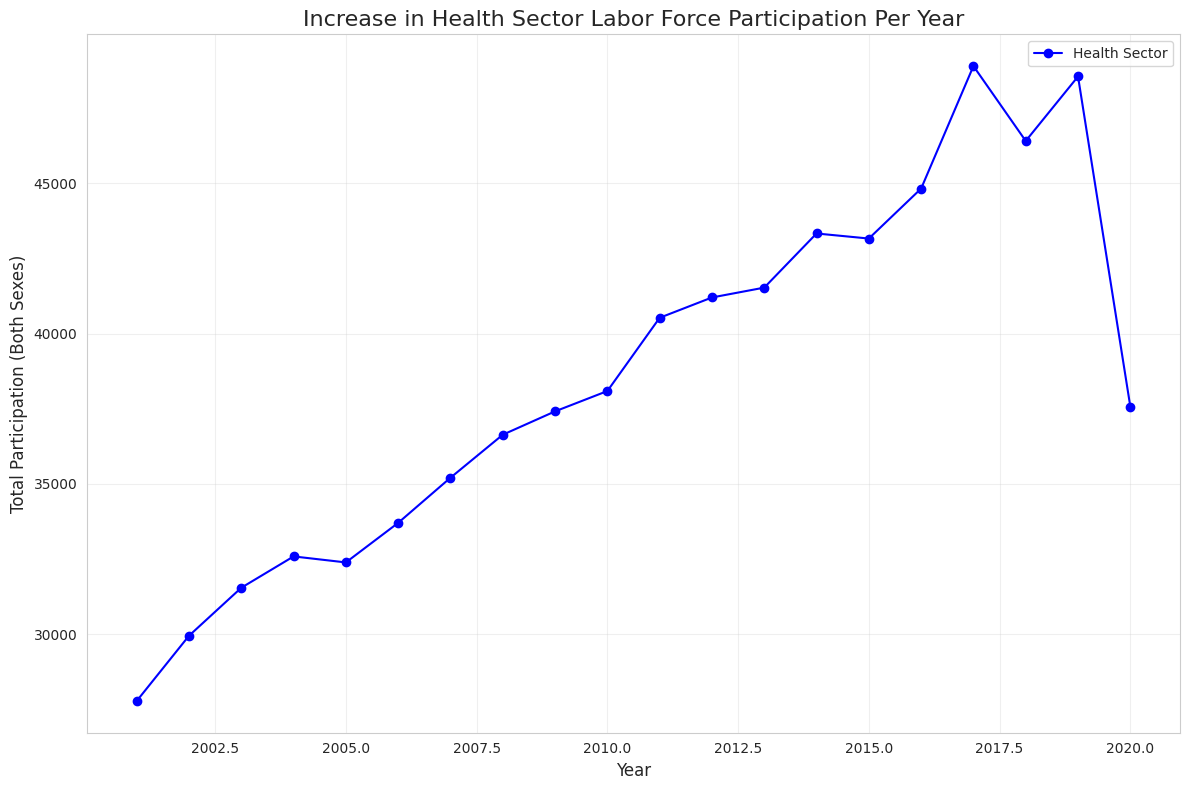

In [ ]:

df_cleaned['year'] = df_cleaned['month'].dt.year

# Filter the data for health-related occupations
# Modify the filter to match broader health-related terms
health_keywords = ['health', 'medical', 'nurse', 'care']

# Filter for health-related occupations
health_sector_data = df_cleaned[df_cleaned['occupation'].str.contains('|'.join(health_keywords), case=False, na=False)]

# Group by year and calculate total participation in the health sector
health_sector_trends = health_sector_data.groupby('year')['both_sexes'].sum().reset_index()

# Plot the trends over the years
plt.figure(figsize=(12, 8))
plt.plot(health_sector_trends['year'], health_sector_trends['both_sexes'], marker='o', linestyle='-', color='b', label='Health Sector')

# Add labels and title
plt.title('Increase in Health Sector Labor Force Participation Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Participation (Both Sexes)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group by year and occupation, summing employment numbers
occupation_by_year = df1.groupby(['year', 'occupation'])[['both_sexes']].sum().reset_index()
top_occupations = occupation_by_year.loc[occupation_by_year.groupby('year')['both_sexes'].idxmax()]
top_occupations

,year,occupation,both_sexes
28,2001,6 - Sales and service occupations,11686.9
78,2002,6 - Sales and service occupations,12179.5
128,2003,6 - Sales and service occupations,12838.4
178,2004,6 - Sales and service occupations,12671.6
228,2005,6 - Sales and service occupations,12845.0
278,2006,6 - Sales and service occupations,13201.2
328,2007,6 - Sales and service occupations,13861.3
378,2008,6 - Sales and service occupations,13618.4
428,2009,6 - Sales and service occupations,13934.5
478,2010,6 - Sales and service occupations,14104.7


In [ ]:
# Group by year and occupation, suming employment numbers
occupation_by_year = df1.groupby(['year', 'occupation'])[['male']].sum().reset_index()
top_occupations_of_males = occupation_by_year.loc[occupation_by_year.groupby('year')['male'].idxmax()]
top_occupations_of_males

,year,occupation,male
35,2001,"7 - Trades, transport and equipment operators ...",6731.1
85,2002,"7 - Trades, transport and equipment operators ...",7167.1
135,2003,"7 - Trades, transport and equipment operators ...",7194.7
185,2004,"7 - Trades, transport and equipment operators ...",7319.1
235,2005,"7 - Trades, transport and equipment operators ...",7339.0
285,2006,"7 - Trades, transport and equipment operators ...",7349.8
335,2007,"7 - Trades, transport and equipment operators ...",7307.0
385,2008,"7 - Trades, transport and equipment operators ...",7503.4
435,2009,"7 - Trades, transport and equipment operators ...",7976.4
485,2010,"7 - Trades, transport and equipment operators ...",7539.6


In [ ]:
# Group by year and occupation, summing employment numbers
occupation_by_year = df1.groupby(['year', 'occupation','geography'])[['male']].sum().reset_index()
top_occupations_of_males = occupation_by_year.loc[occupation_by_year.groupby(['year','geography'])['male'].idxmax()]
top_occupations_of_males

,year,occupation,geography,male
140,2001,"7 - Trades, transport and equipment operators ...",Central region,2937.2
141,2001,"7 - Trades, transport and equipment operators ...",Eastern region,924.2
142,2001,"7 - Trades, transport and equipment operators ...",Northern region,543.9
143,2001,"7 - Trades, transport and equipment operators ...",Western region,2325.8
340,2002,"7 - Trades, transport and equipment operators ...",Central region,3226.2
...,...,...,...,...
3743,2019,"7 - Trades, transport and equipment operators ...",Western region,2574.3
3940,2020,"7 - Trades, transport and equipment operators ...",Central region,2874.0
3913,2020,6 - Sales and service occupations,Eastern region,867.6
3942,2020,"7 - Trades, transport and equipment operators ...",Northern region,387.6


In [ ]:
# Group by year and occupation, summing employment numbers
occupation_by_year = df1.groupby(['year', 'occupation'])[['female']].sum().reset_index()
top_occupations_of_females = occupation_by_year.loc[occupation_by_year.groupby('year')['female'].idxmax()]
top_occupations_of_females

,year,occupation,female
28,2001,6 - Sales and service occupations,6680.6
78,2002,6 - Sales and service occupations,7045.6
128,2003,6 - Sales and service occupations,7313.8
178,2004,6 - Sales and service occupations,7313.1
228,2005,6 - Sales and service occupations,7316.6
278,2006,6 - Sales and service occupations,7633.4
328,2007,6 - Sales and service occupations,7988.7
378,2008,6 - Sales and service occupations,7930.6
428,2009,6 - Sales and service occupations,7916.8
478,2010,6 - Sales and service occupations,8155.6


In [ ]:
# Group by year and occupation, summing employment numbers
occupation_by_year = df1.groupby(['year', 'occupation','geography'])[['female']].sum().reset_index()
top_occupations_of_females = occupation_by_year.loc[occupation_by_year.groupby(['year','geography'])['female'].idxmax()]
top_occupations_of_females

,year,occupation,geography,female
20,2001,"1 - Business, finance and administration occup...",Central region,3418.7
113,2001,6 - Sales and service occupations,Eastern region,966.5
114,2001,6 - Sales and service occupations,Northern region,501.6
115,2001,6 - Sales and service occupations,Western region,2105.7
220,2002,"1 - Business, finance and administration occup...",Central region,3364.7
...,...,...,...,...
3715,2019,6 - Sales and service occupations,Western region,2375.6
3912,2020,6 - Sales and service occupations,Central region,3300.8
3913,2020,6 - Sales and service occupations,Eastern region,992.0
3914,2020,6 - Sales and service occupations,Northern region,293.8


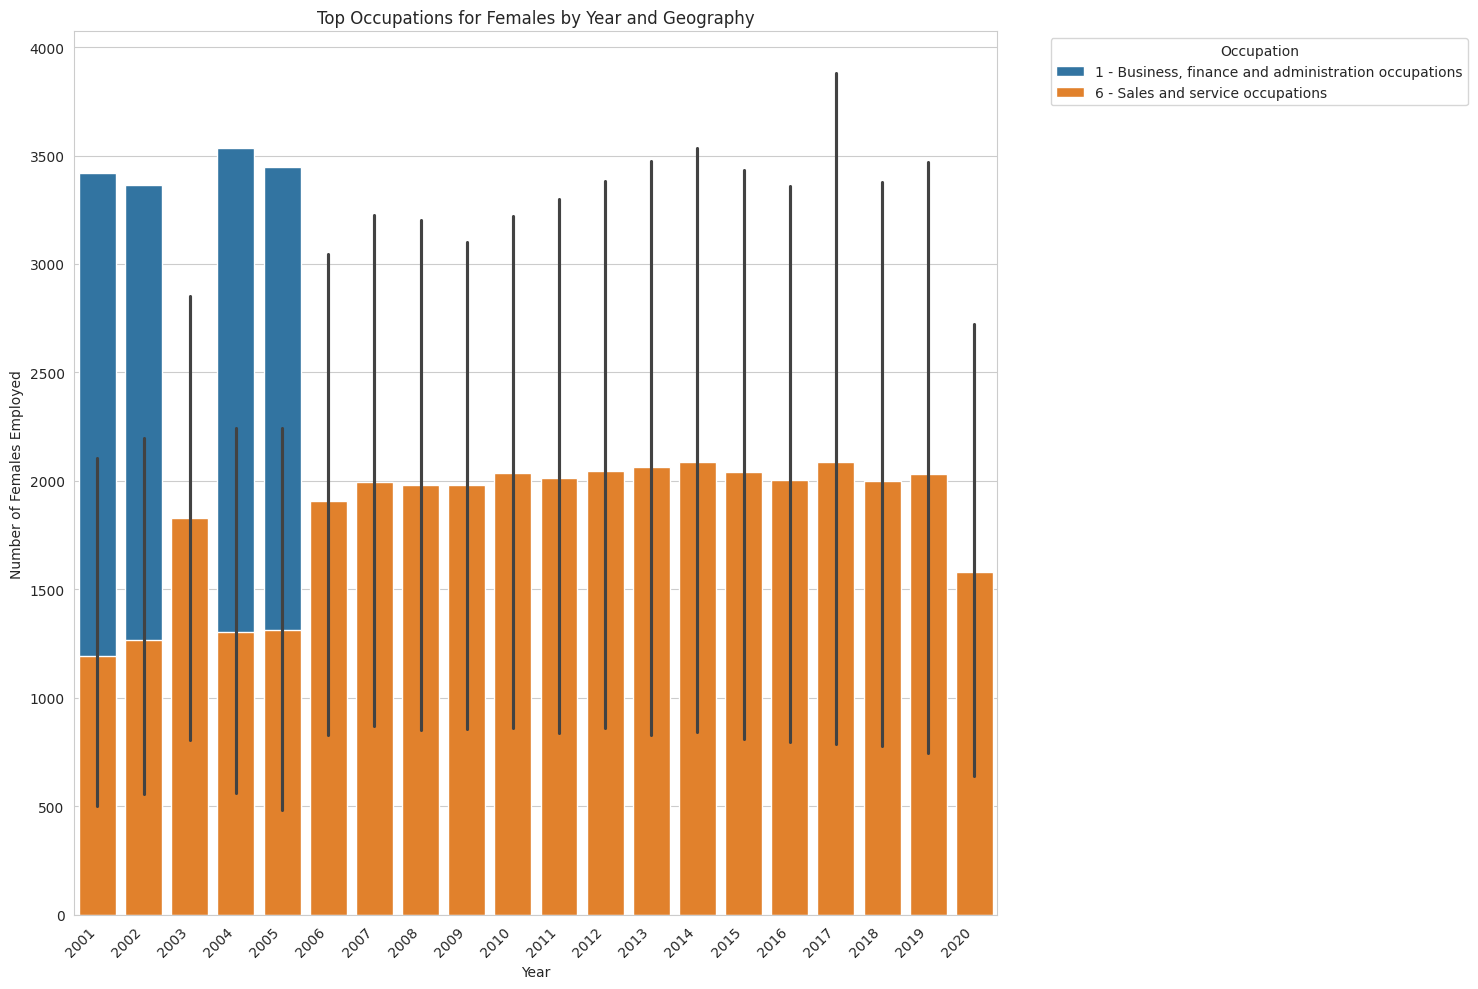

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='female', hue='occupation', data=top_occupations_of_females, dodge=False)

# Customize the plot
plt.title('Top Occupations for Females by Year and Geography')
plt.xlabel('Year')
plt.ylabel('Number of Females Employed')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a grad

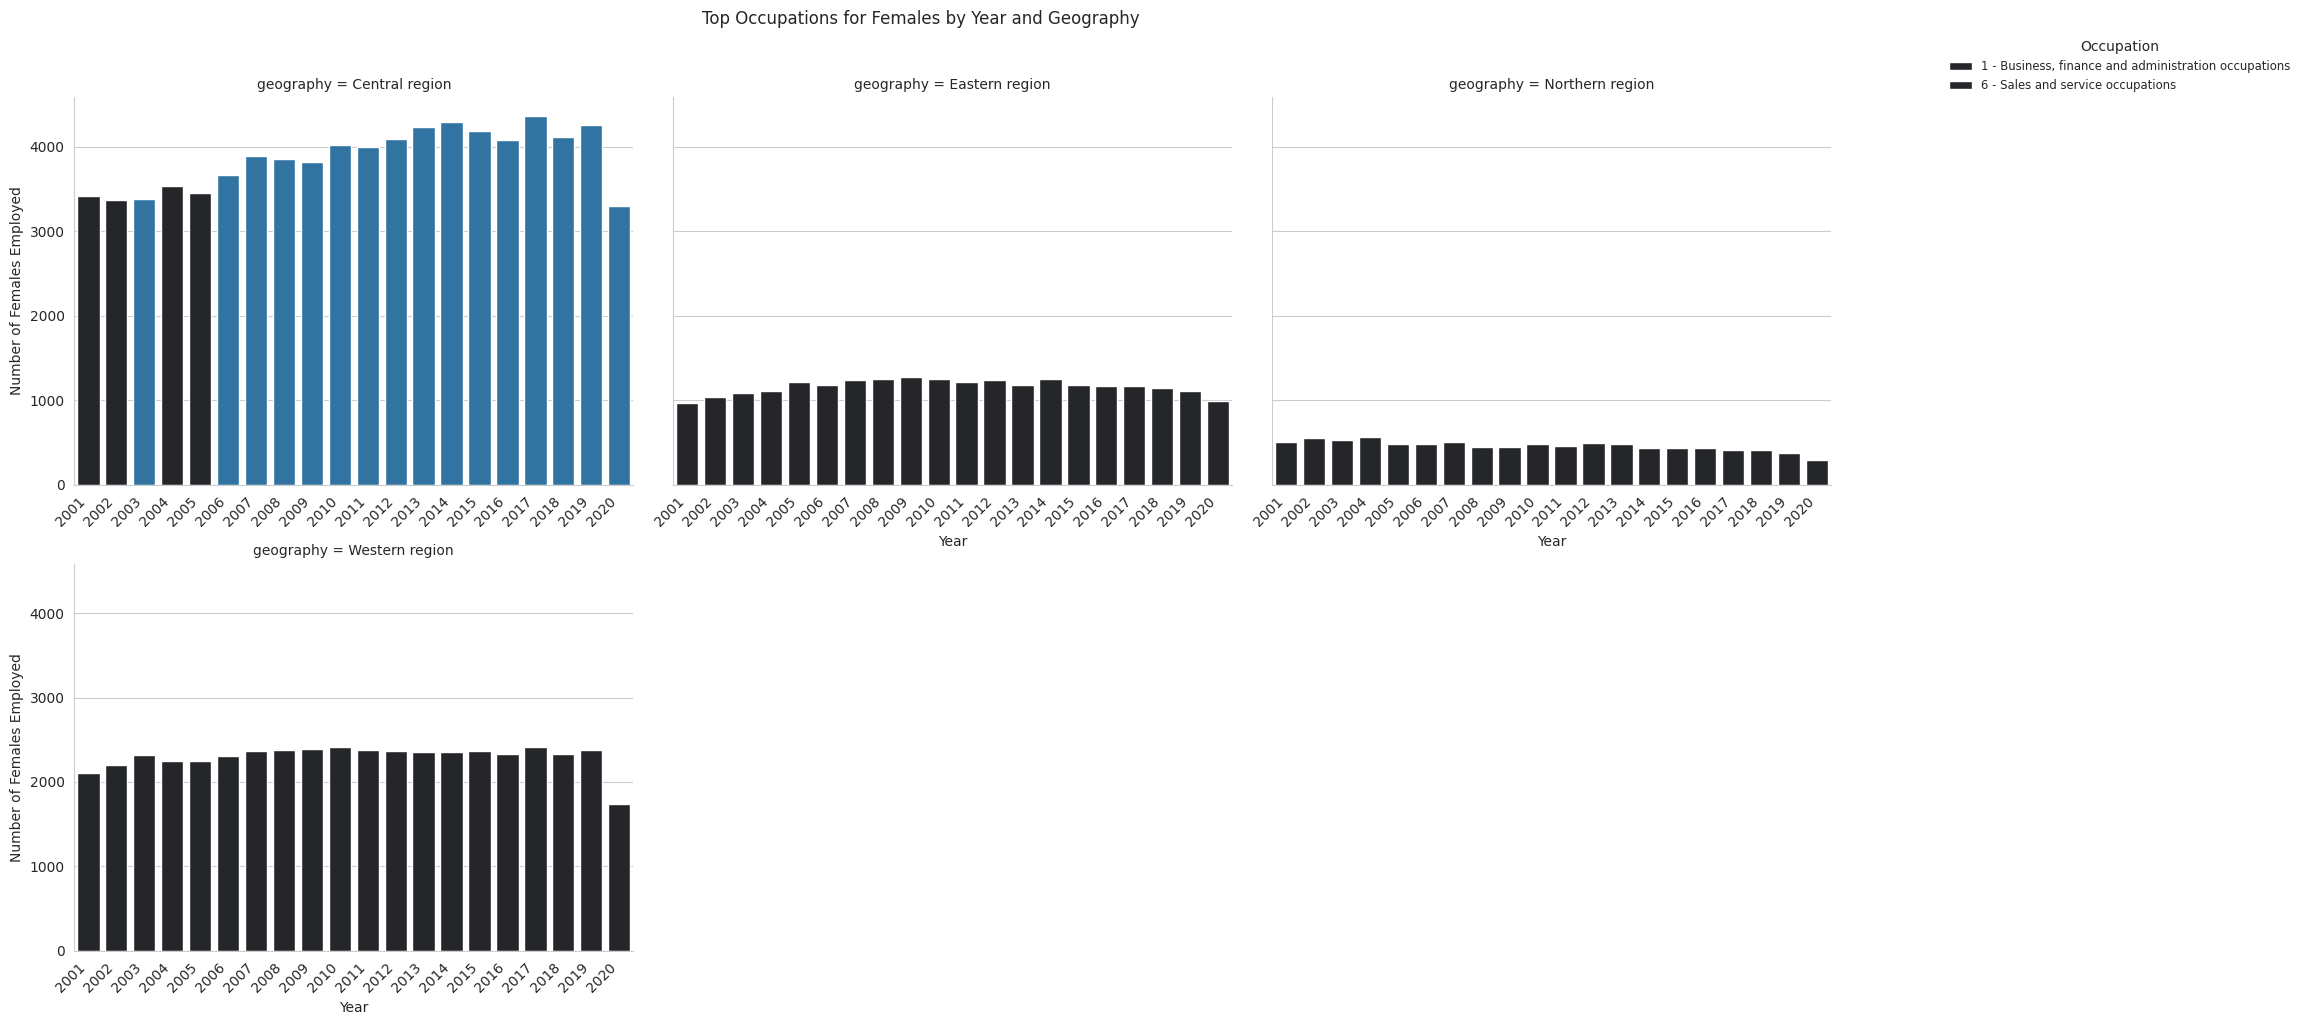

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot with facet grid
g = sns.FacetGrid(top_occupations_of_females, col='geography', col_wrap=3, height=5, sharex=False)  # sharex=False to allow independent x-axis
g.map(sns.barplot, 'year', 'female', 'occupation', dodge=False)
# Customize the plot
g.fig.suptitle('Top Occupations for Females by Year and Geography', y=1.02)
g.set_axis_labels('Year', 'Number of Females Employed')
g.set_xticklabels(rotation=45, ha='right')

# Adjust legend position and font size
g.add_legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Adjust subplot spacing for better label visibility
g.fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase vertical and horizontal spacing

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a grad

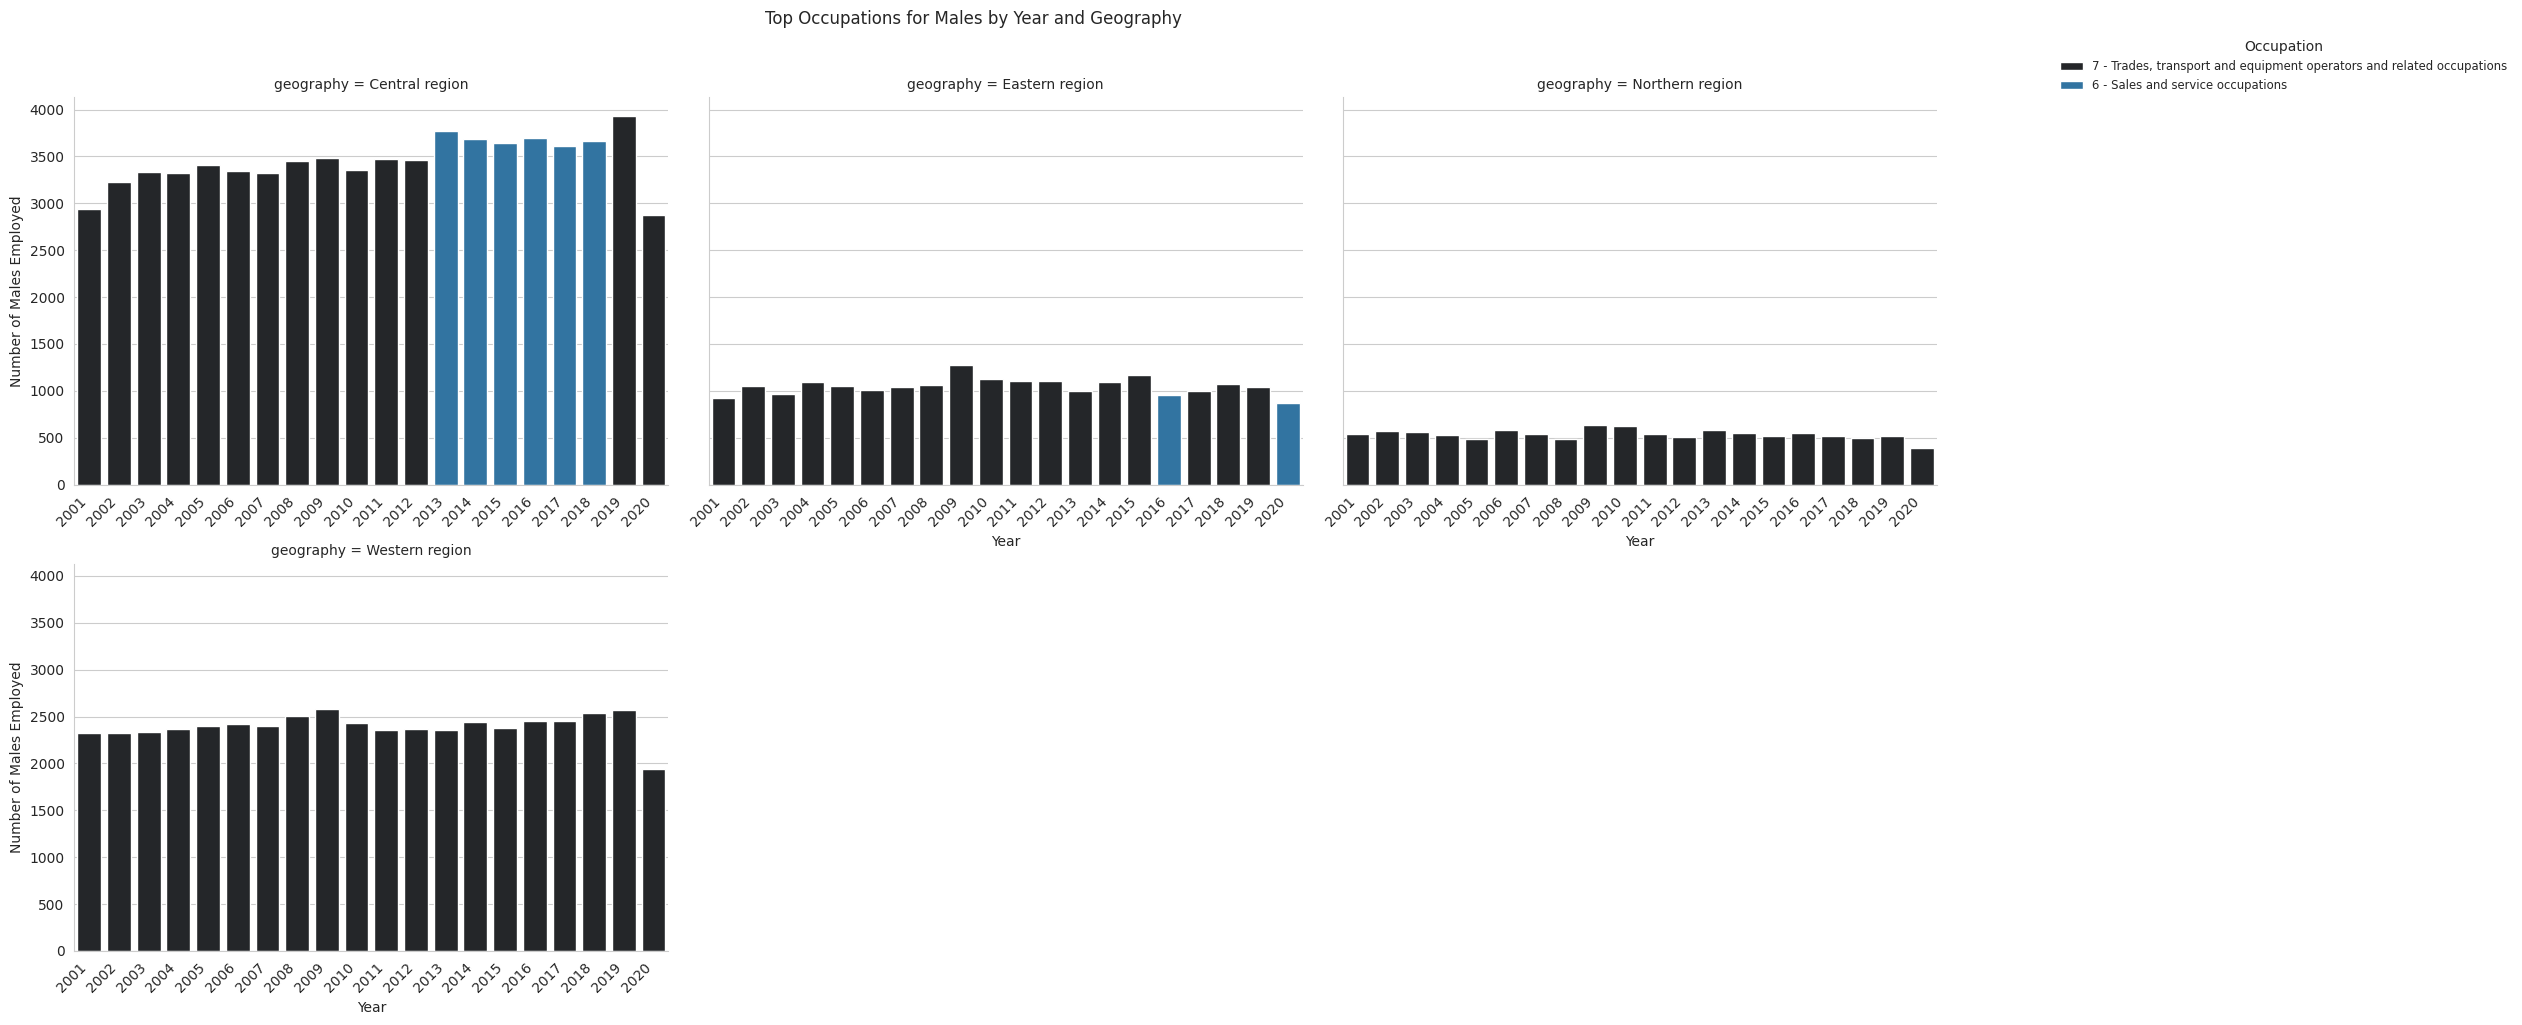

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot with facet grid
g = sns.FacetGrid(top_occupations_of_males, col='geography', col_wrap=3, height=5, sharex=False)  # sharex=False to allow independent x-axis
g.map(sns.barplot, 'year', 'male', 'occupation', dodge=False)

# Customize the plot
g.fig.suptitle('Top Occupations for Males by Year and Geography', y=1.02)
g.set_axis_labels('Year', 'Number of Males Employed')
g.set_xticklabels(rotation=45, ha='right')

# Adjust legend position and font size
g.add_legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Adjust subplot spacing for better label visibility
g.fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase vertical and horizontal spacing

# Show the plot
plt.tight_layout()
plt.show()